In [151]:
from limpeza_padronizacao import *
from pipelines.pipeline_meteostat_diario import acessar_csv_s3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from datetime import datetime
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder

### Obtendo os dados meteorológicos do S3

In [72]:
bucket_name = 'black-umbrella-fiap'
object_key = 'bronze/meteostat/dados_diarios_1950_2024.csv'

In [73]:
df_meteo = acessar_csv_s3(bucket_name, object_key)

In [74]:
df_meteo

,index,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Distrito,latitude_distrito,longitude_distrito
0,1950-01-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Água Rasa,-23.565372,-46.573697
1,1950-01-02,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Água Rasa,-23.565372,-46.573697
2,1950-01-03,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Água Rasa,-23.565372,-46.573697
3,1950-01-04,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Água Rasa,-23.565372,-46.573697
4,1950-01-05,NaN,NaN,NaN,29.3,NaN,NaN,NaN,NaN,NaN,NaN,Água Rasa,-23.565372,-46.573697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559540,2024-09-05,19.8,15.0,29.0,0.1,NaN,126.0,18.7,NaN,1017.5,NaN,Lajeado,-23.536248,-46.410022
2559541,2024-09-06,17.9,14.7,25.5,0.0,NaN,123.0,17.4,NaN,1019.3,NaN,Lajeado,-23.536248,-46.410022
2559542,2024-09-07,23.1,15.4,31.9,0.4,NaN,68.0,10.6,NaN,1018.0,NaN,Lajeado,-23.536248,-46.410022
2559543,2024-09-08,24.9,18.9,32.4,0.0,NaN,76.0,9.6,NaN,1019.3,NaN,Lajeado,-23.536248,-46.410022


In [100]:
dados_meteo = df_meteo.copy()

In [101]:
dados_meteo = dados_meteo.drop(columns=['snow', 'wpgt', 'tsun'])

In [102]:
dados_meteo = padronizar_dados(dados_meteo)

In [103]:
dados_meteo

,index,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,latitude_distrito,longitude_distrito
8406,1973-01-06,24.3,20.0,31.0,0.3,332.0,10.1,1015.4,Agua Rasa,-23.565372,-46.573697
8407,1973-01-07,25.8,21.0,32.0,8.6,345.0,7.2,1015.3,Agua Rasa,-23.565372,-46.573697
8408,1973-01-08,25.7,21.0,31.0,0.0,315.0,7.8,1017.1,Agua Rasa,-23.565372,-46.573697
8413,1973-01-13,25.9,21.0,31.0,0.8,341.0,4.1,1016.4,Agua Rasa,-23.565372,-46.573697
8414,1973-01-14,25.9,22.0,32.0,0.0,339.0,6.7,1015.5,Agua Rasa,-23.565372,-46.573697
...,...,...,...,...,...,...,...,...,...,...,...
2559540,2024-09-05,19.8,15.0,29.0,0.1,126.0,18.7,1017.5,Lajeado,-23.536248,-46.410022
2559541,2024-09-06,17.9,14.7,25.5,0.0,123.0,17.4,1019.3,Lajeado,-23.536248,-46.410022
2559542,2024-09-07,23.1,15.4,31.9,0.4,68.0,10.6,1018.0,Lajeado,-23.536248,-46.410022
2559543,2024-09-08,24.9,18.9,32.4,0.0,76.0,9.6,1019.3,Lajeado,-23.536248,-46.410022


In [104]:
dados_meteo.dtypes

index                  object
tavg                  float64
tmin                  float64
tmax                  float64
prcp                  float64
wdir                  float64
wspd                  float64
pres                  float64
distrito               object
latitude_distrito     float64
longitude_distrito    float64
dtype: object

In [158]:
dados_meteo['prcp'].max()

72.1

### Obtendo os dados de ocorrências do S3

In [23]:
bucket_name = 'black-umbrella-fiap'
object_key = 'bronze/ocorrencias/ocorrencias_2013_2024.csv'

In [24]:
df_ocorr = acessar_csv_s3(bucket_name, object_key)

In [105]:
dados_ocorr = df_ocorr.copy()

In [106]:
dados_ocorr

,data,ocorrencia,subprefeit,name,geometry,Latitude,Longitude
0,2013-12-29 00:00:00,QUEDA DE ARVORE,BT - BUTANTA,47368,POINT Z (318923.7137 7389107.424428 0),-23.598443,-46.774643
1,2013-12-03 00:00:00,QUEDA DE ARVORE,CS - CAPELA DO SOCORRO,45006,POINT Z (326291.010146 7378438.554415 0),-23.695577,-46.703712
2,2013-12-10 00:00:00,ALAGAMENTO,SA - SANTO AMARO,45361,POINT Z (325784.879025 7383070.030225 0),-23.653706,-46.708130
3,2013-12-30 00:00:00,QUEDA DE ARVORE,SE - SE,47427,POINT Z (332913.137082 7396238.345912 0),-23.535563,-46.636786
4,2013-12-29 00:00:00,QUEDA DE ARVORE,SA - SANTO AMARO,47337,POINT Z (325940.608356 7385402.683087 0),-23.632662,-46.706331
...,...,...,...,...,...,...,...
58147,2024-01-31 00:00:00,ALAGAMENTO,SB - SAPOPEMBA,32057914,POINT (347483.631646 7386553.451906),-23.624450,-46.495083
58148,2024-01-31 00:00:00,QUEDA DE ARVORE,IQ - ITAQUERA,32058056,POINT (354127.125688 7394828.6609),-23.550340,-46.429165
58149,2024-01-31 00:00:00,INUNDACAO,CS - CAPELA DO SOCORRO,32058336,POINT (328375.102682 7375680.958842),-23.720698,-46.683598
58150,2024-01-31 00:00:00,QUEDA DE ARVORE,BT - BUTANTA,32058368,POINT (324562.933229 7390714.964635),-23.584550,-46.719206


In [107]:
dados_ocorr = padronizar_dados(dados_ocorr)

In [108]:
dados_ocorr.dtypes

data           object
ocorrencia     object
subprefeit     object
name            int64
geometry       object
latitude      float64
longitude     float64
dtype: object

____

## Daqui pra baixo foram feitos apenas testes, nao considerar como versão final

### Início Integração dos dados

In [109]:
dados_meteo['index'] = pd.to_datetime(dados_meteo['index'])
dados_ocorr['data'] = pd.to_datetime(dados_ocorr['data'], format='mixed')

In [112]:
dados_meteo['latitude_distrito'] = dados_meteo.rename(columns={'latitude_distrito': 'latitude', 'longitude_distrito': 'longitude'}, inplace=True)

In [114]:
dados_meteo = dados_meteo.drop(columns=['latitude_distrito'])

In [115]:
dados_meteo

,index,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,latitude,longitude
8406,1973-01-06,24.3,20.0,31.0,0.3,332.0,10.1,1015.4,Agua Rasa,-23.565372,-46.573697
8407,1973-01-07,25.8,21.0,32.0,8.6,345.0,7.2,1015.3,Agua Rasa,-23.565372,-46.573697
8408,1973-01-08,25.7,21.0,31.0,0.0,315.0,7.8,1017.1,Agua Rasa,-23.565372,-46.573697
8413,1973-01-13,25.9,21.0,31.0,0.8,341.0,4.1,1016.4,Agua Rasa,-23.565372,-46.573697
8414,1973-01-14,25.9,22.0,32.0,0.0,339.0,6.7,1015.5,Agua Rasa,-23.565372,-46.573697
...,...,...,...,...,...,...,...,...,...,...,...
2559540,2024-09-05,19.8,15.0,29.0,0.1,126.0,18.7,1017.5,Lajeado,-23.536248,-46.410022
2559541,2024-09-06,17.9,14.7,25.5,0.0,123.0,17.4,1019.3,Lajeado,-23.536248,-46.410022
2559542,2024-09-07,23.1,15.4,31.9,0.4,68.0,10.6,1018.0,Lajeado,-23.536248,-46.410022
2559543,2024-09-08,24.9,18.9,32.4,0.0,76.0,9.6,1019.3,Lajeado,-23.536248,-46.410022


In [126]:
ocorrencias = dados_ocorr.copy()
meteorologia = dados_meteo.copy()

In [127]:
# Usaremos o KNN para encontrar a estação meteorológica mais próxima de cada ocorrência
knn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(meteorologia[['latitude', 'longitude']])
distances, indices = knn.kneighbors(ocorrencias[['latitude', 'longitude']])

In [128]:
# Adicionar as informações da estação meteorológica mais próxima à base de ocorrências
ocorrencias['Nearest_Station_Index'] = indices

In [129]:
# Juntar os dados meteorológicos baseados no índice da estação mais próxima
ocorrencias['Latitude_Meteo'] = meteorologia.iloc[indices.flatten()]['latitude'].values
ocorrencias['Longitude_Meteo'] = meteorologia.iloc[indices.flatten()]['longitude'].values


In [ ]:
# Filtrando apenas as colunas de interesse: latitude, longitude e data
ocorrencias_coords = ocorrencias[['latitude', 'longitude', 'data']]
meteorologia_coords = meteorologia[['index', 'latitude', 'longitude']]

In [ ]:
# Verificando se as colunas de latitude e longitude não possuem valores nulos
ocorrencias_coords.dropna(subset=['latitude', 'longitude'], inplace=True)
meteorologia_coords.dropna(subset=['latitude', 'longitude'], inplace=True)

In [ ]:
# KNN para encontrar o distrito mais próximo de cada ocorrência
knn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(meteorologia_coords[['latitude', 'longitude']])
distances, indices = knn.kneighbors(ocorrencias_coords[['latitude', 'longitude']])

In [ ]:
# Informações meteorológicas do distrito mais próximo à base de ocorrências
ocorrencias['Nearest_Station_Index'] = indices.flatten()
ocorrencias['Latitude_Meteo'] = meteorologia_coords.iloc[indices.flatten()]['latitude'].values
ocorrencias['Longitude_Meteo'] = meteorologia_coords.iloc[indices.flatten()]['longitude'].values

In [ ]:
# Adicionando a informação do distrito mais próximo à base de meteorologia
meteorologia['Nearest_Station_Index'] = meteorologia.index

In [ ]:
# Preparando o dataframe de meteorologia para a mesclagem
meteorologia_renamed = meteorologia.rename(columns={
    'index': 'data_meteo',  # Renomeando a coluna 'index' para 'data_meteo' para evitar conflito
    'latitude': 'Latitude_Meteo',
    'longitude': 'Longitude_Meteo'
})

In [ ]:
# Mesclando com base na data e localização
dados_integrados = pd.merge_asof(
    ocorrencias.sort_values('data'),
    meteorologia_renamed.sort_values('data_meteo'),
    left_on='data',
    right_on='data_meteo',
    by=['Latitude_Meteo', 'Longitude_Meteo'],
    tolerance=pd.Timedelta('23H'),  # Definir a tolerância de 1 hora
    direction='nearest'  # Usar o registro meteorológico mais próximo no tempo
)

In [139]:
dados_integrados

,data,ocorrencia,subprefeit,name,geometry,latitude,longitude,Latitude_Meteo,Longitude_Meteo,Nearest_Station_Index_x,data_meteo,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,Nearest_Station_Index_y
0,2013-01-01,Queda De Arvore,Ip - Ipiranga,8323,Point Z (337237.040801 7386010.96626 0),-23.628349,-46.595558,-23.632301,-46.619563,67968,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,Alagamento,Pi - Pinheiros,8324,Point Z (328631.776652 7393375.032265 0),-23.560969,-46.679041,-23.557818,-46.660537,64349,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,Queda De Arvore,Mb - M Boi Mirim,8277,Point Z (320355.666468 7375302.693551 0),-23.723237,-46.762284,-23.712528,-46.768720,107449,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-02,Queda De Arvore,Em - Ermelino Matarazzo,12474,Point Z (346972.016825 7398177.129414 0),-23.519444,-46.498905,-23.511046,-46.487052,155523,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-02,Queda De Arvore,Sa - Santo Amaro,12483,Point Z (330295.886859 7386432.934076 0),-23.623824,-46.663532,-23.629934,-46.670417,37857,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57927,2024-07-31,Queda De Arvore,St - Santana/Tucuruvi,33136772,Point (331447.043944 7405215.83985),-23.454353,-46.650134,-23.463693,-46.641611,124218,2024-07-31,15.9,12.1,22.0,0.0,104.0,17.2,1025.0,Mandaqui,1391290.0
57928,2024-07-31,Queda De Arvore,Ja - Jabaquara,33137680,Point (331737.151191 7384180.116012),-23.644315,-46.649663,-23.648710,-46.645451,94874,2024-07-31,16.6,14.0,23.0,1.0,121.0,13.2,1026.7,Jabaquara,1036637.0
57929,2024-07-31,Queda De Arvore,Ja - Jabaquara,33141236,Point (332252.003439 7385569.59964),-23.631823,-46.644461,-23.615178,-46.643393,189875,2024-07-31,16.6,14.0,23.0,1.0,121.0,13.2,1026.7,Saude,2073315.0
57930,2024-07-31,Queda De Arvore,Mb - Mboi Mirim,33137008,Point (320893.133397 7381951.766442),-23.663267,-46.756210,-23.673927,-46.740738,111639,2024-07-31,16.6,14.0,23.0,1.0,121.0,13.2,1026.7,Jardim Sao Luis,1254885.0


In [137]:
dados_integrados['tavg'].isnull().sum()

22814

<Axes: xlabel='data'>

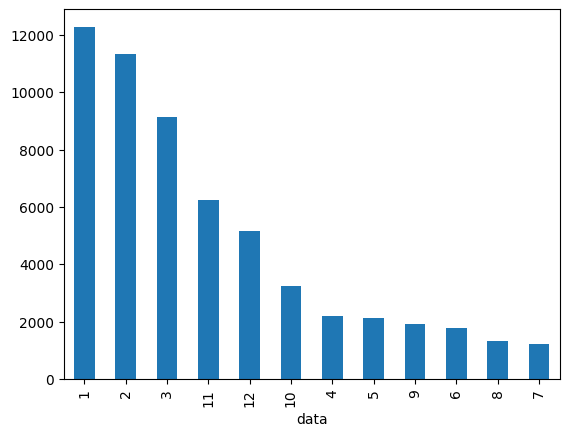

In [147]:
dados_integrados['data'].dt.month.value_counts().plot(kind='bar')

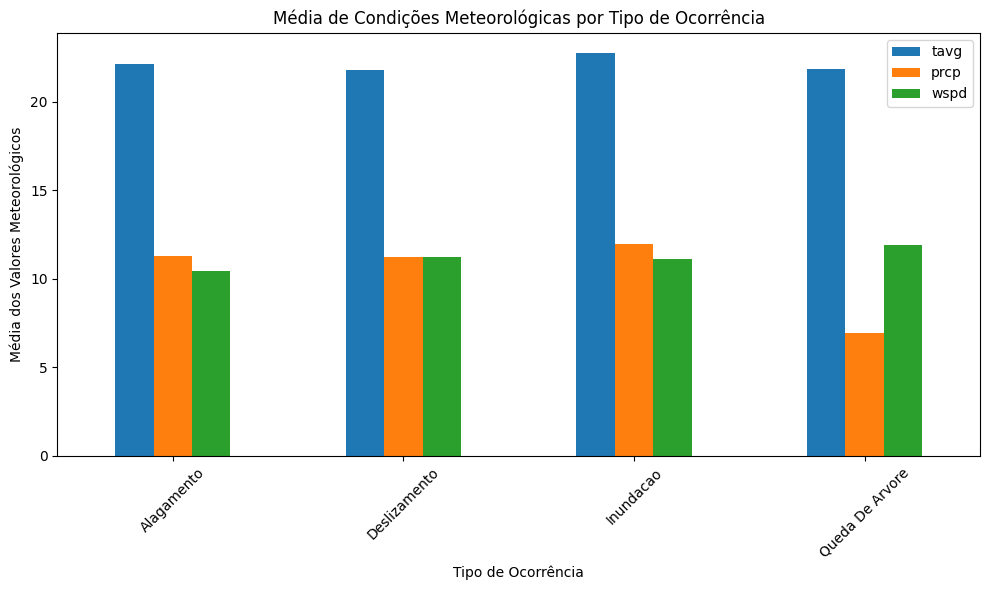

In [150]:
# Selecionando as colunas meteorológicas numéricas
colunas_meteorologicas = ['tavg', 'prcp', 'wspd']

# Removendo linhas com todas as colunas meteorológicas NaN
ocorrencias_clean = dados_integrados.dropna(subset=colunas_meteorologicas, how='all')

# Agrupando por tipo de ocorrência e calculando a média das colunas meteorológicas
ocorrencias_meteorologicas = ocorrencias_clean.groupby('ocorrencia')[colunas_meteorologicas].mean()

# Plotando um gráfico de barras
ocorrencias_meteorologicas.plot(kind='bar', figsize=(10,6))
plt.title('Média de Condições Meteorológicas por Tipo de Ocorrência')
plt.ylabel('Média dos Valores Meteorológicos')
plt.xlabel('Tipo de Ocorrência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

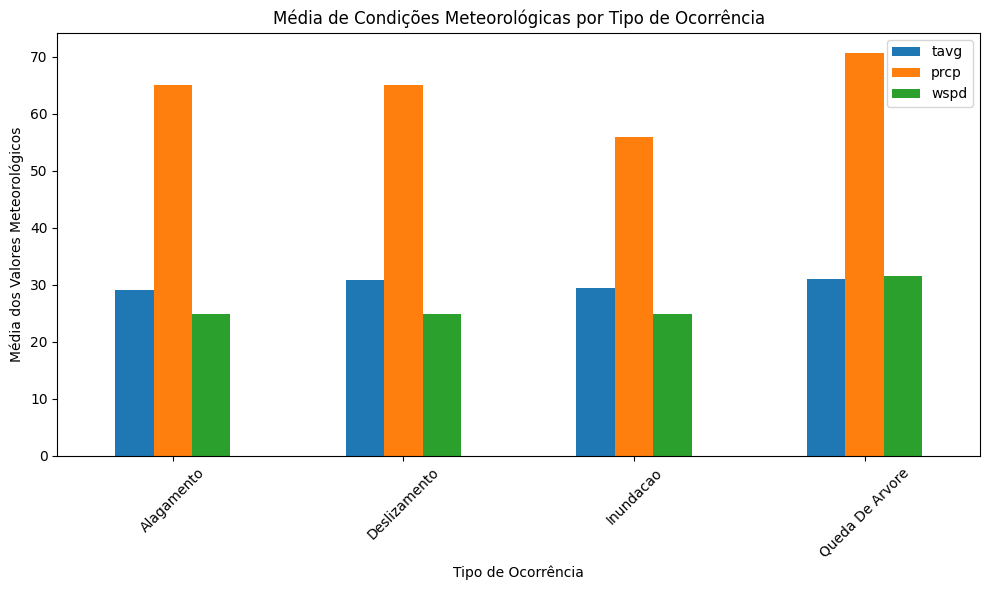

In [163]:
# Selecionando as colunas meteorológicas numéricas
colunas_meteorologicas = ['tavg', 'prcp', 'wspd']

# Removendo linhas com todas as colunas meteorológicas NaN
ocorrencias_clean = dados_integrados.dropna(subset=colunas_meteorologicas, how='all')

# Agrupando por tipo de ocorrência e calculando a média das colunas meteorológicas
ocorrencias_meteorologicas = ocorrencias_clean.groupby('ocorrencia')[colunas_meteorologicas].max()

# Plotando um gráfico de barras
ocorrencias_meteorologicas.plot(kind='bar', figsize=(10,6))
plt.title('Média de Condições Meteorológicas por Tipo de Ocorrência')
plt.ylabel('Média dos Valores Meteorológicos')
plt.xlabel('Tipo de Ocorrência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                    tavg      tmax      tmin      prcp      wspd  \
tavg            1.000000  0.834340  0.825161 -0.014358 -0.221691   
tmax            0.834340  1.000000  0.689899 -0.096453 -0.226125   
tmin            0.825161  0.689899  1.000000  0.051116 -0.195271   
prcp           -0.014358 -0.096453  0.051116  1.000000 -0.059166   
wspd           -0.221691 -0.226125 -0.195271 -0.059166  1.000000   
ocorrencia_num -0.023780  0.069779 -0.042498 -0.124578  0.092455   

                ocorrencia_num  
tavg                 -0.023780  
tmax                  0.069779  
tmin                 -0.042498  
prcp                 -0.124578  
wspd                  0.092455  
ocorrencia_num        1.000000  


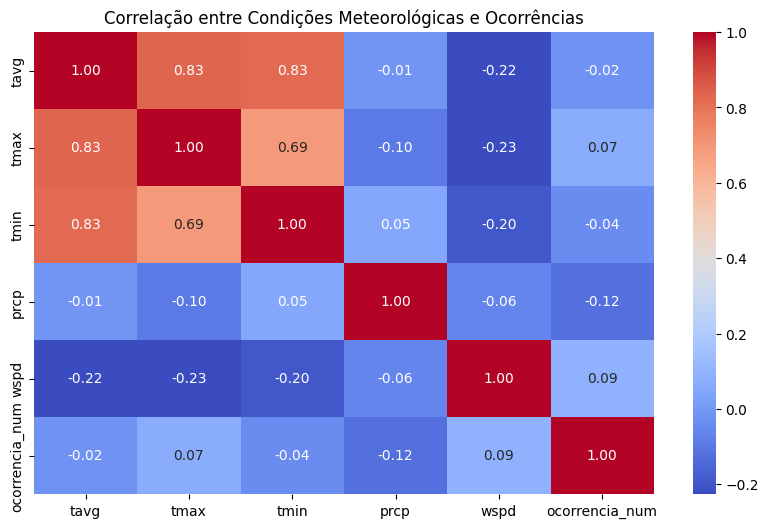

In [152]:
# Garantir que as colunas meteorológicas são numéricas
colunas_meteorologicas = ['tavg', 'tmax', 'tmin', 'prcp', 'wspd']

# Remover linhas com todas as colunas meteorológicas NaN
ocorrencias_clean = dados_integrados.dropna(subset=colunas_meteorologicas, how='all')

# Transformar a coluna 'ocorrencia' em variável numérica (label encoding)
le = LabelEncoder()
ocorrencias_clean['ocorrencia_num'] = le.fit_transform(ocorrencias_clean['ocorrencia'])

# Criar um DataFrame apenas com as colunas numéricas
dados_numericos = ocorrencias_clean[colunas_meteorologicas + ['ocorrencia_num']]

# Calcular a matriz de correlação
correlation_matrix = dados_numericos.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Plotar a matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Condições Meteorológicas e Ocorrências')
plt.show()

In [156]:
from meteostat import Point, Daily
from datetime import datetime

# Definir datas diretamente no código
start = datetime(2024, 7, 29)
end = datetime(2024, 7, 31)

# Iterar sobre as linhas do DataFrame e obter dados do Meteostat
location = Point(-23.713964, -46.699088)

# Obter dados diários do Meteostat
data = Daily(location, start, end).fetch()

data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-07-29,18.7,15.0,27.8,0.0,NaN,175.0,13.4,NaN,1023.4,NaN
2024-07-30,14.2,9.6,19.0,1.0,NaN,158.0,15.9,NaN,1025.7,NaN
2024-07-31,16.6,14.0,23.0,1.0,NaN,121.0,13.2,NaN,1026.7,NaN
